In [1]:
# Main Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Warnings
import warnings
warnings.filterwarnings('ignore')

# Sklearn Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error,r2_score

# Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector

Matplotlib is building the font cache; this may take a moment.


In [2]:
import sys
print(sys.executable)

/opt/homebrew/opt/python@3.13/bin/python3.13


In [3]:
df = pd.read_csv("Cellphone.csv")
df.shape

(161, 14)

In [5]:
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [7]:
df.isna().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

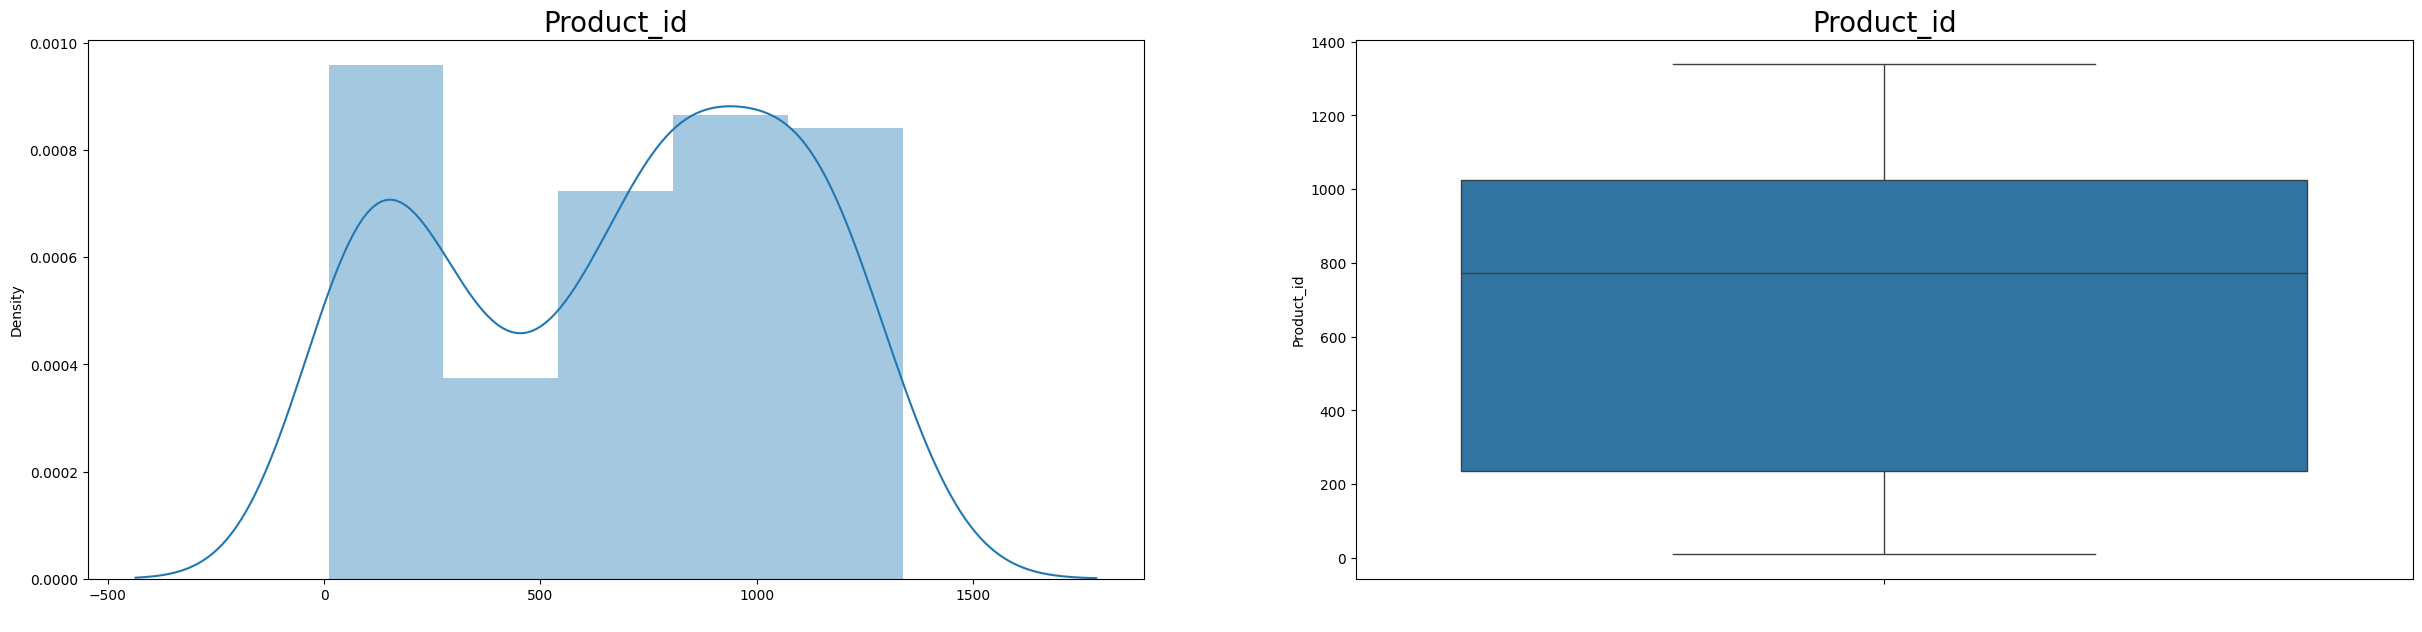

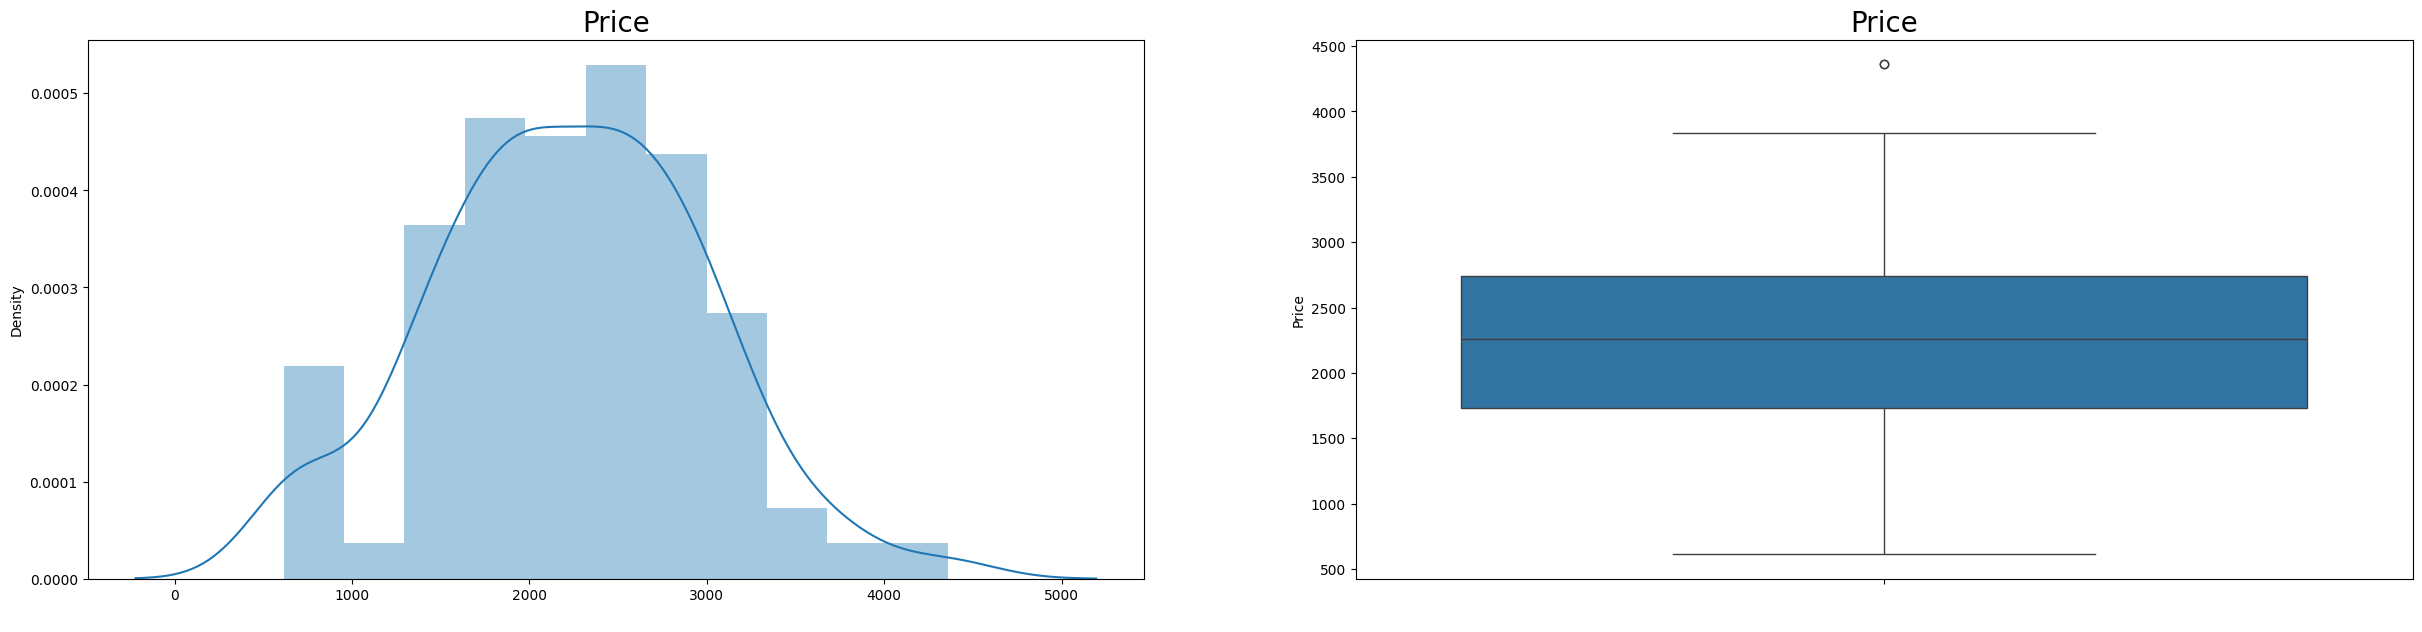

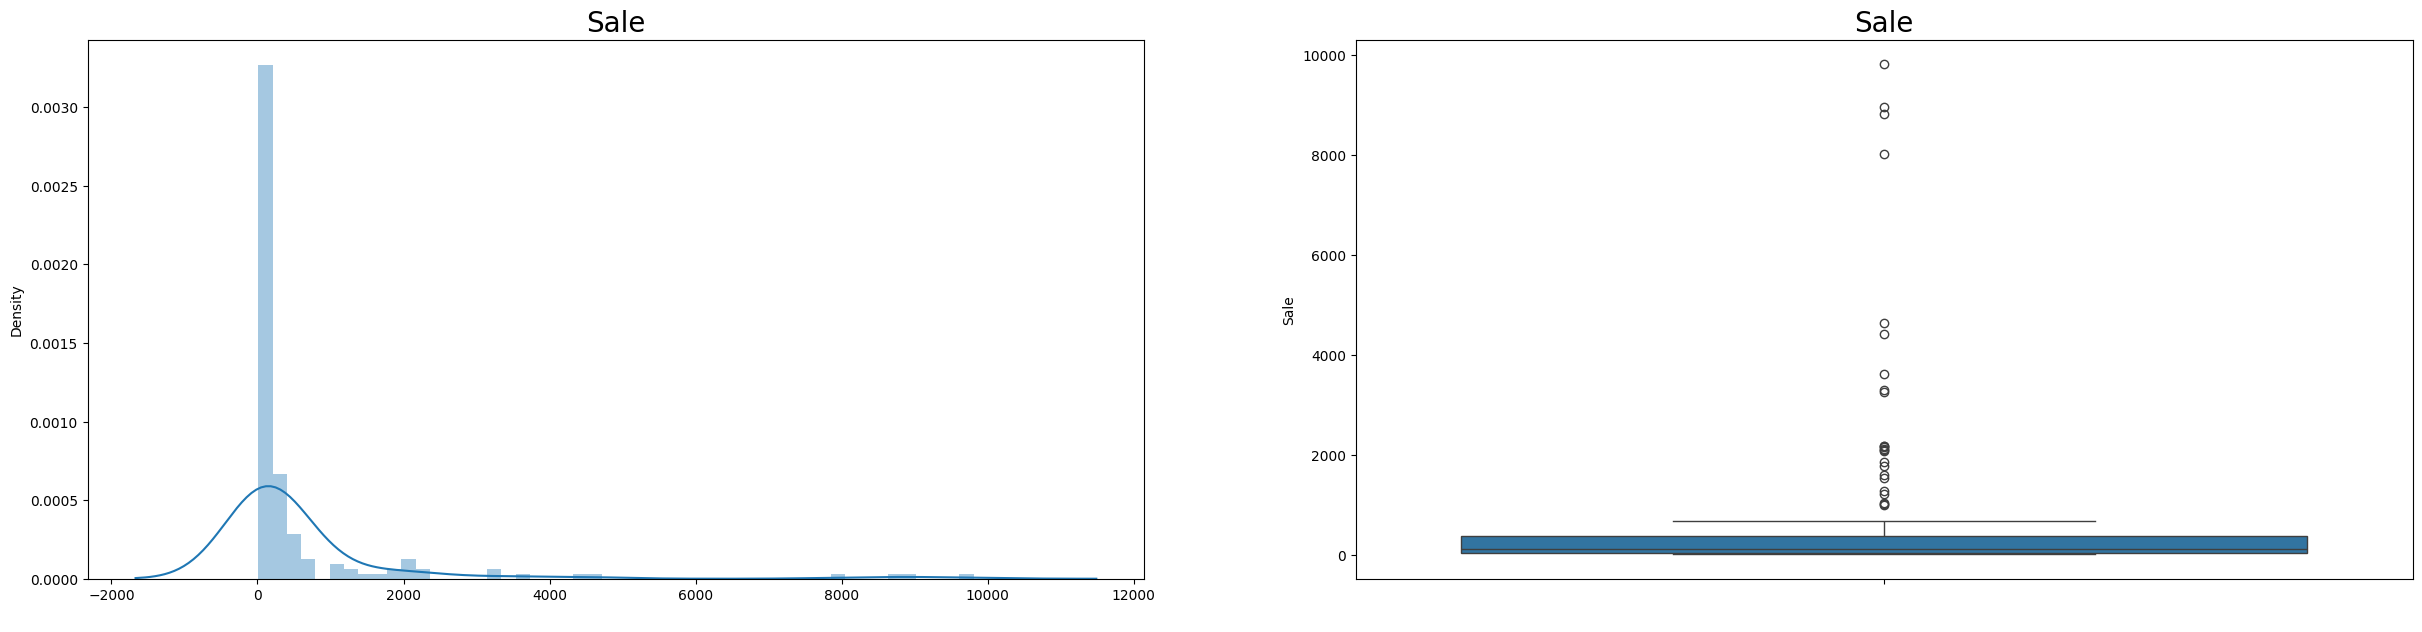

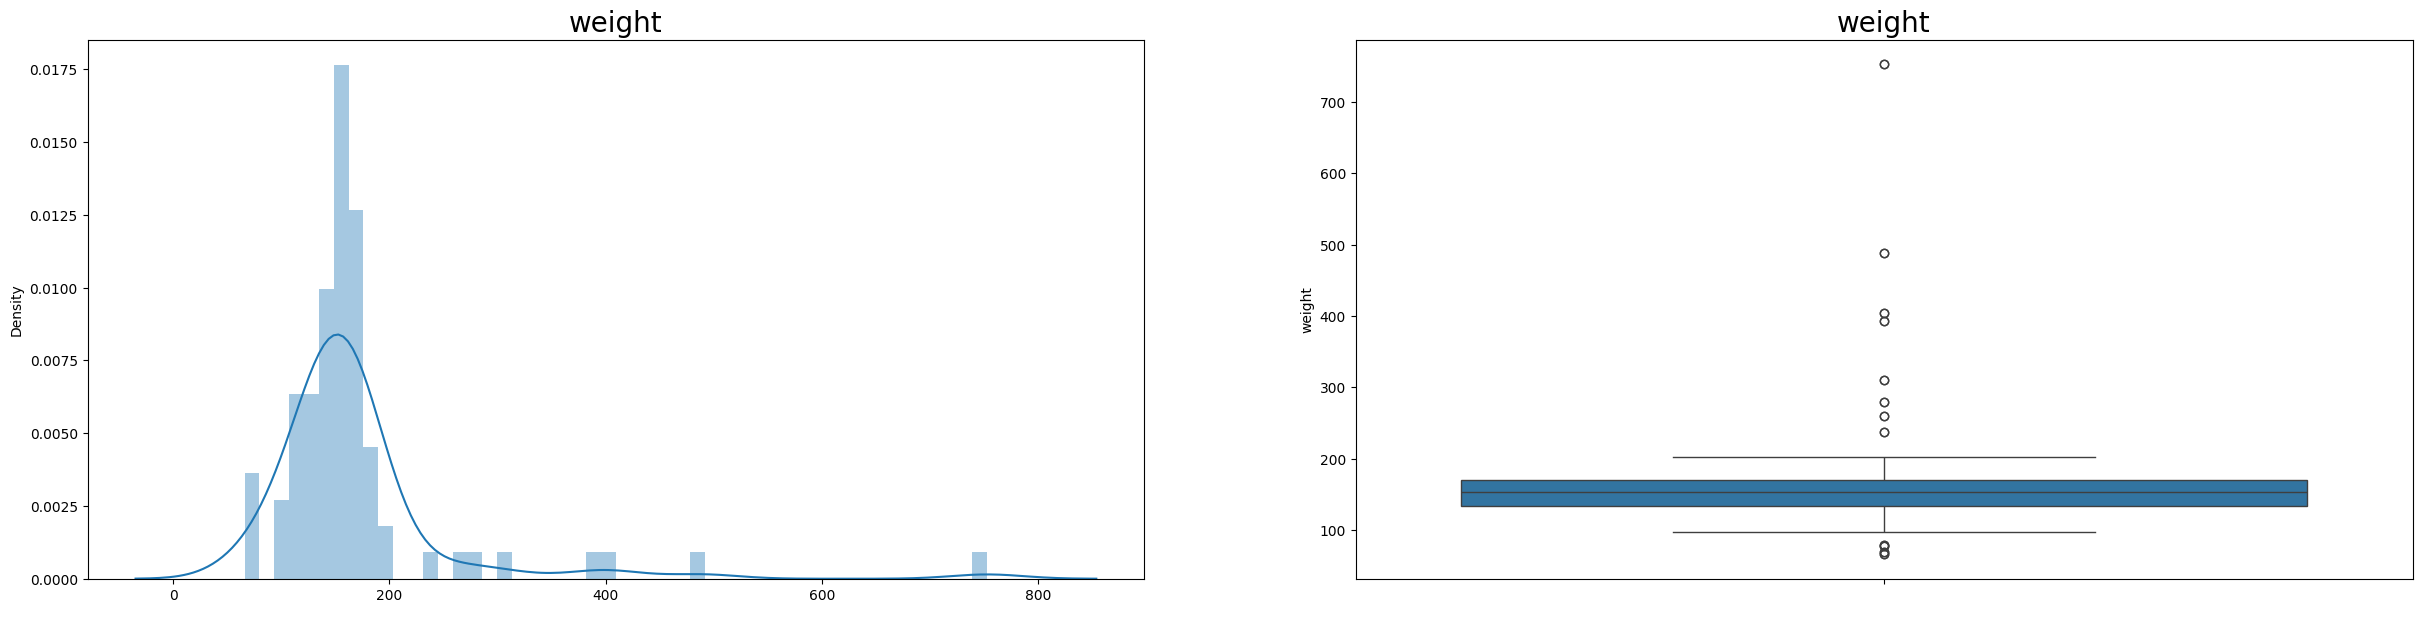

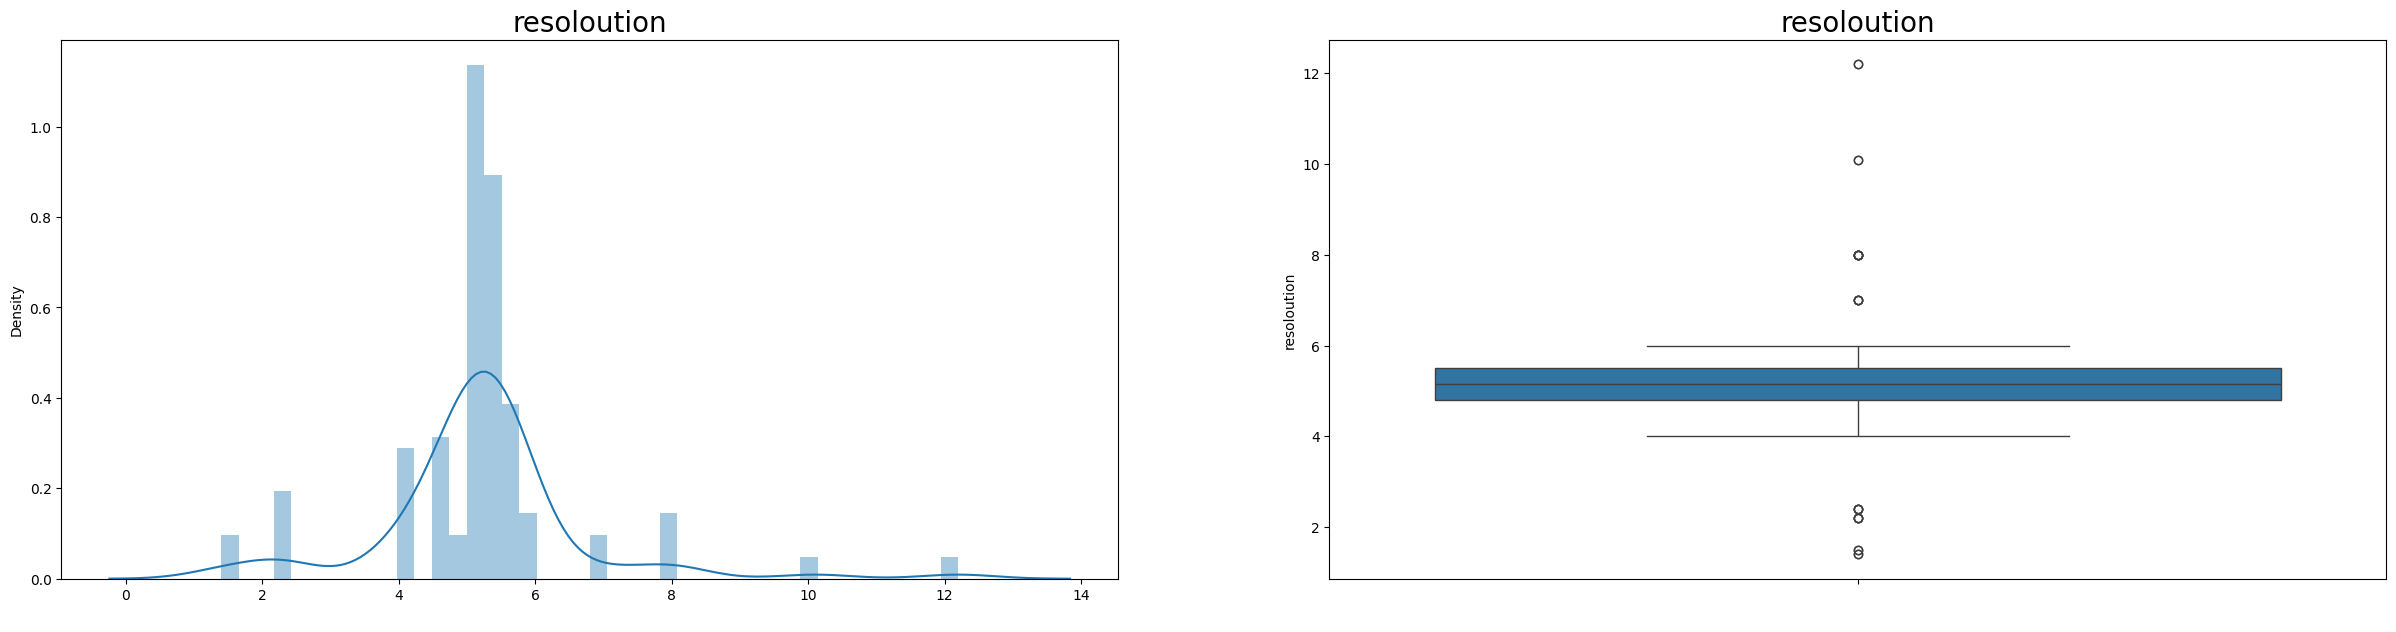

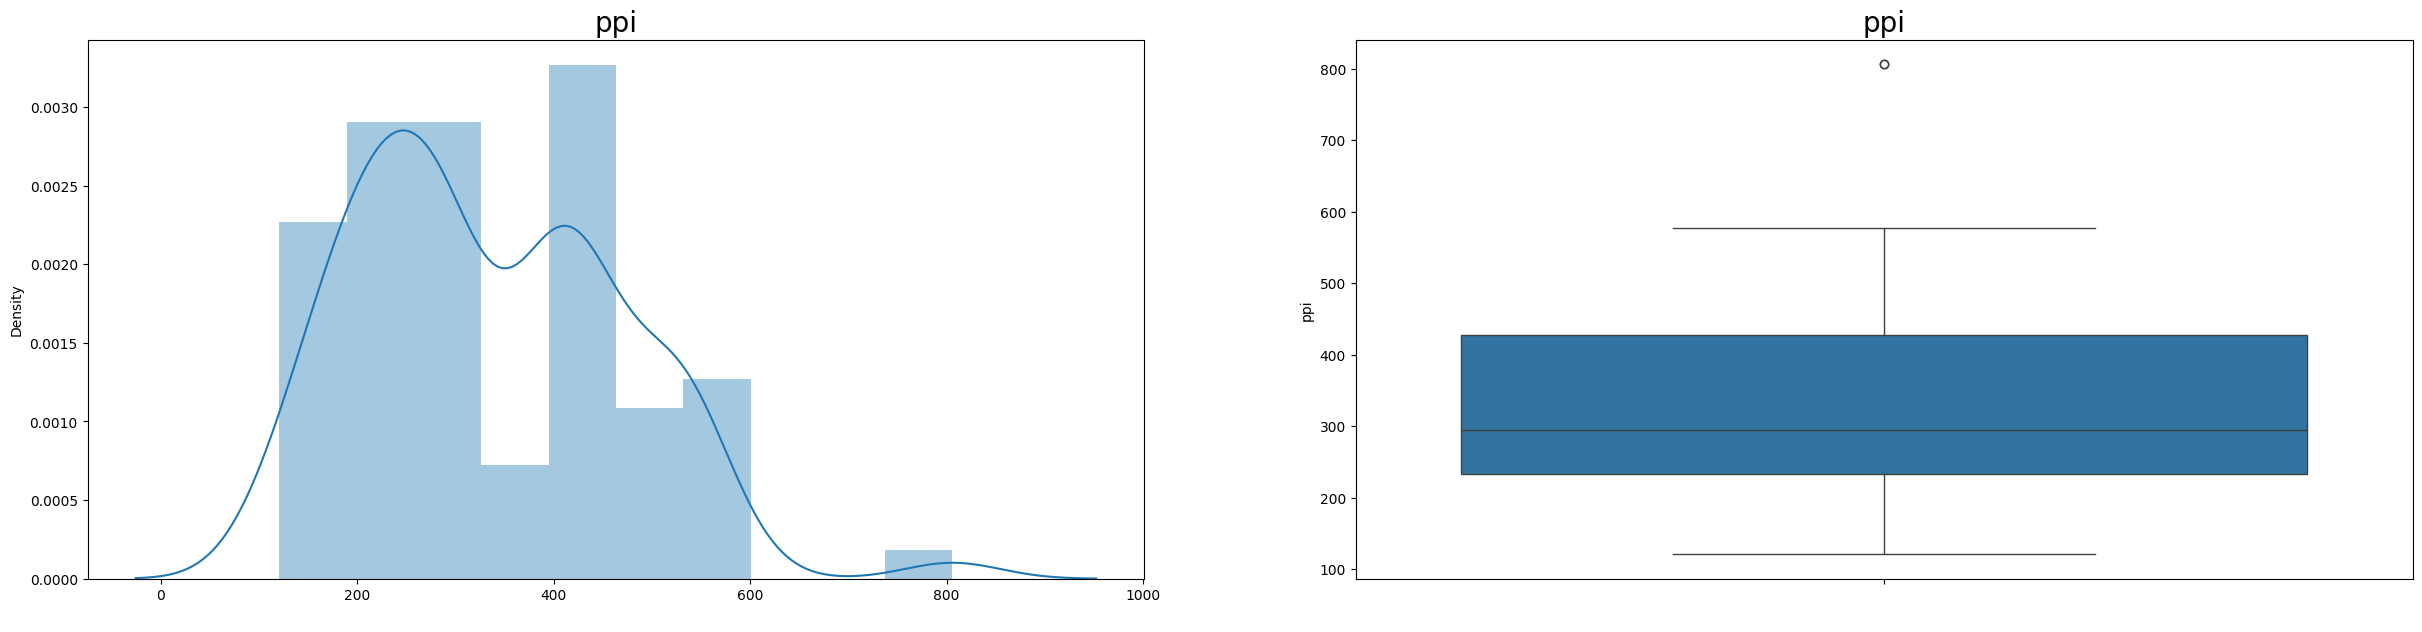

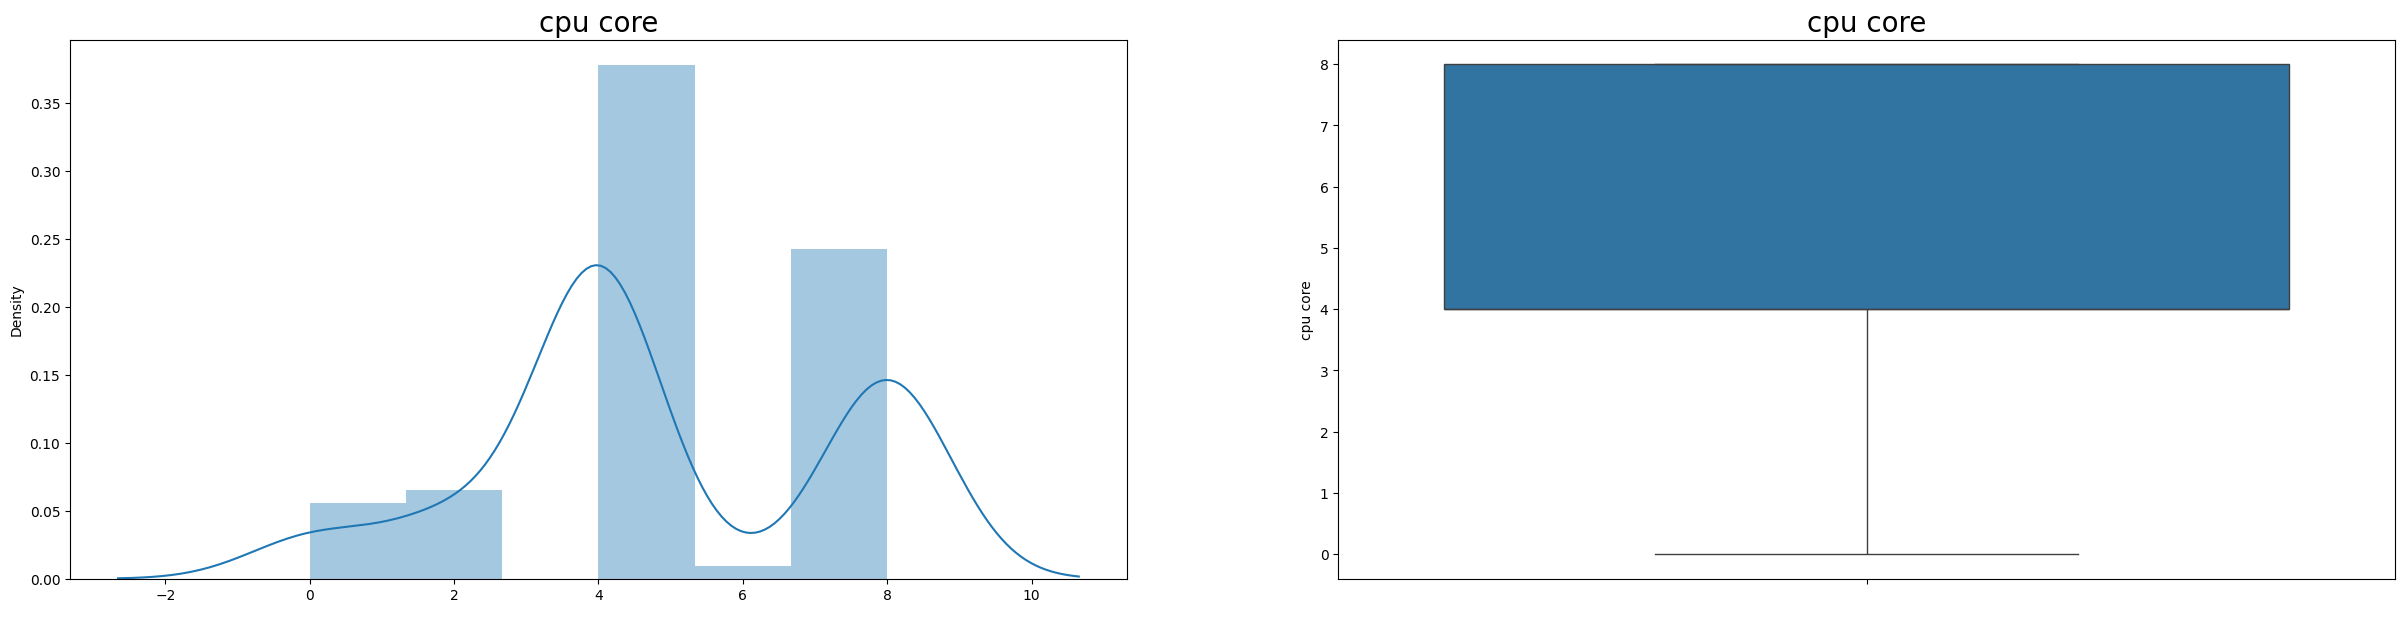

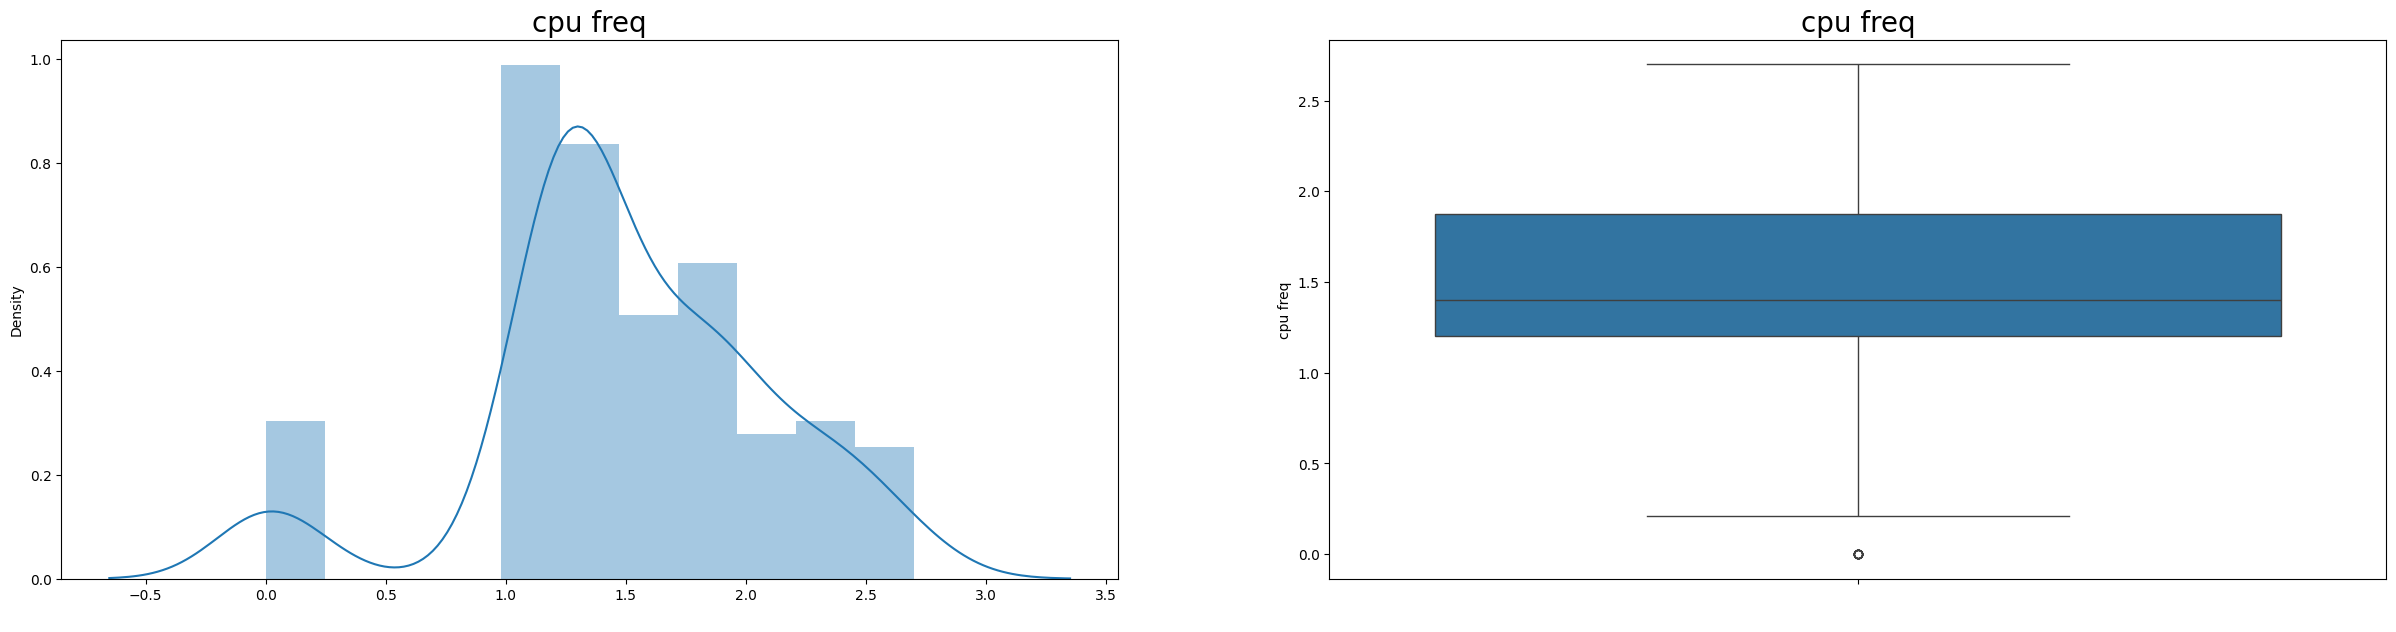

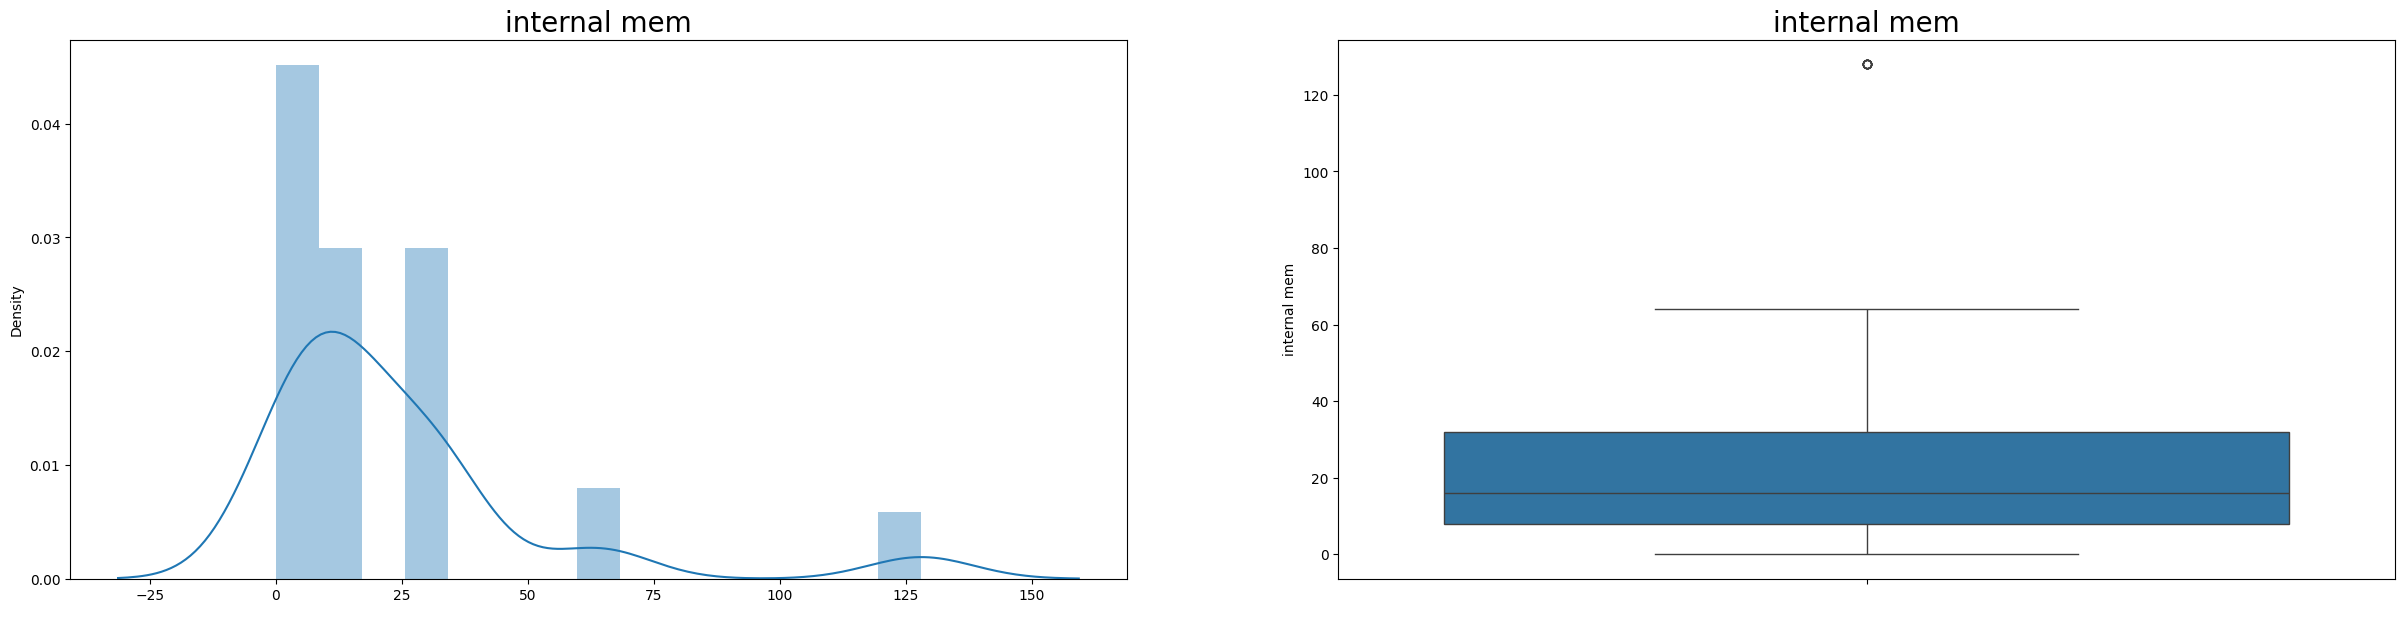

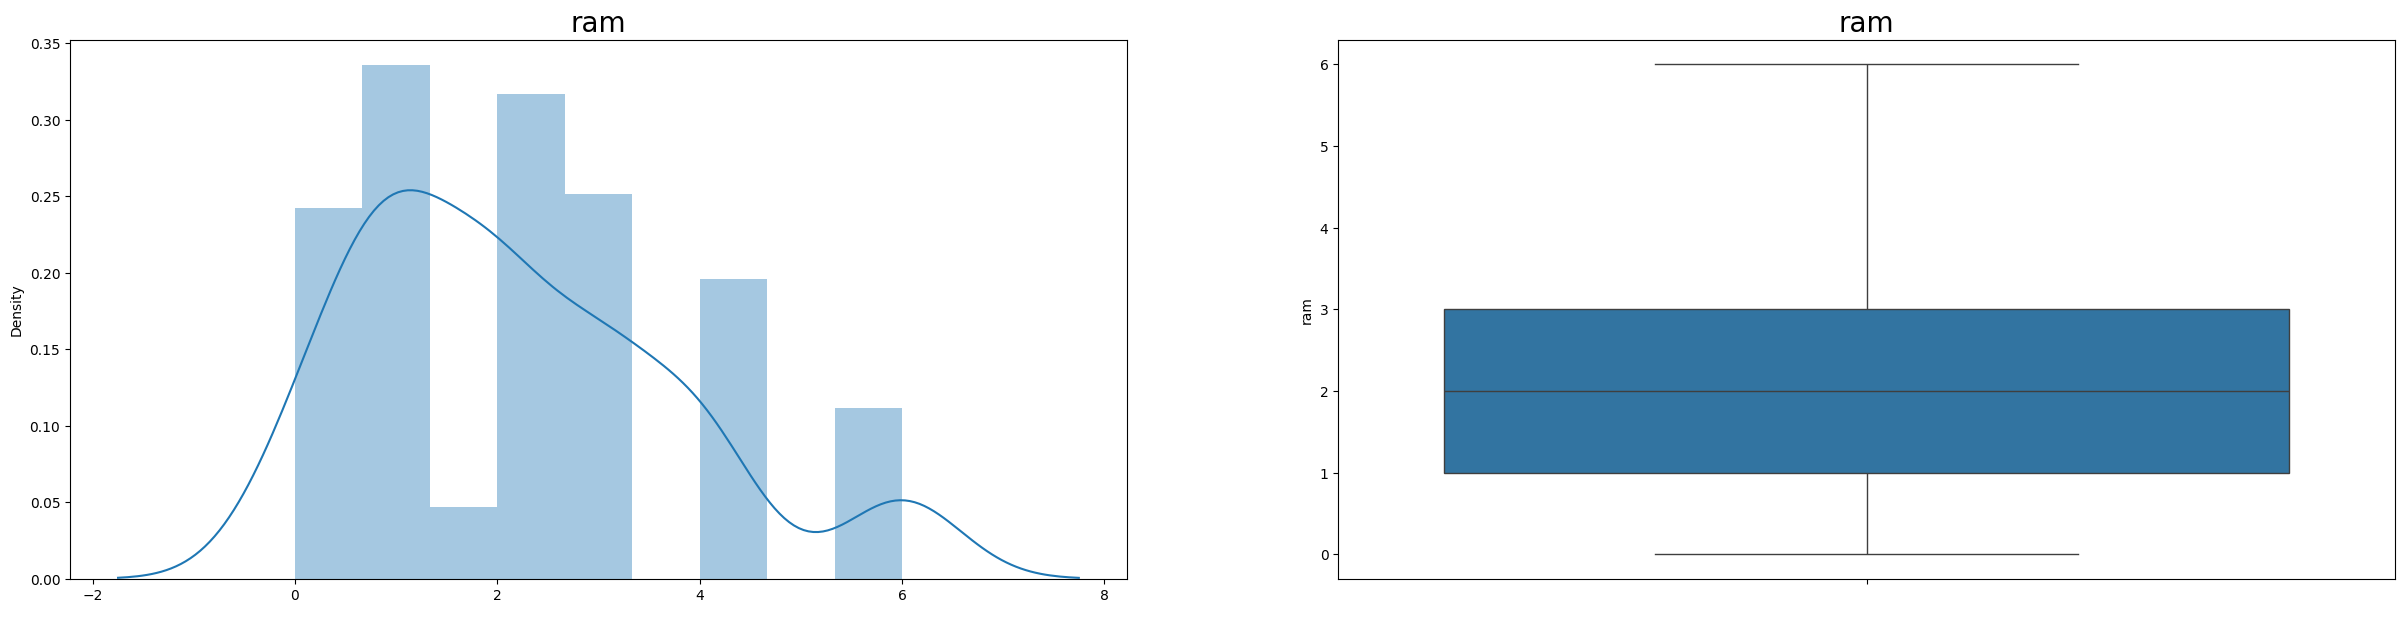

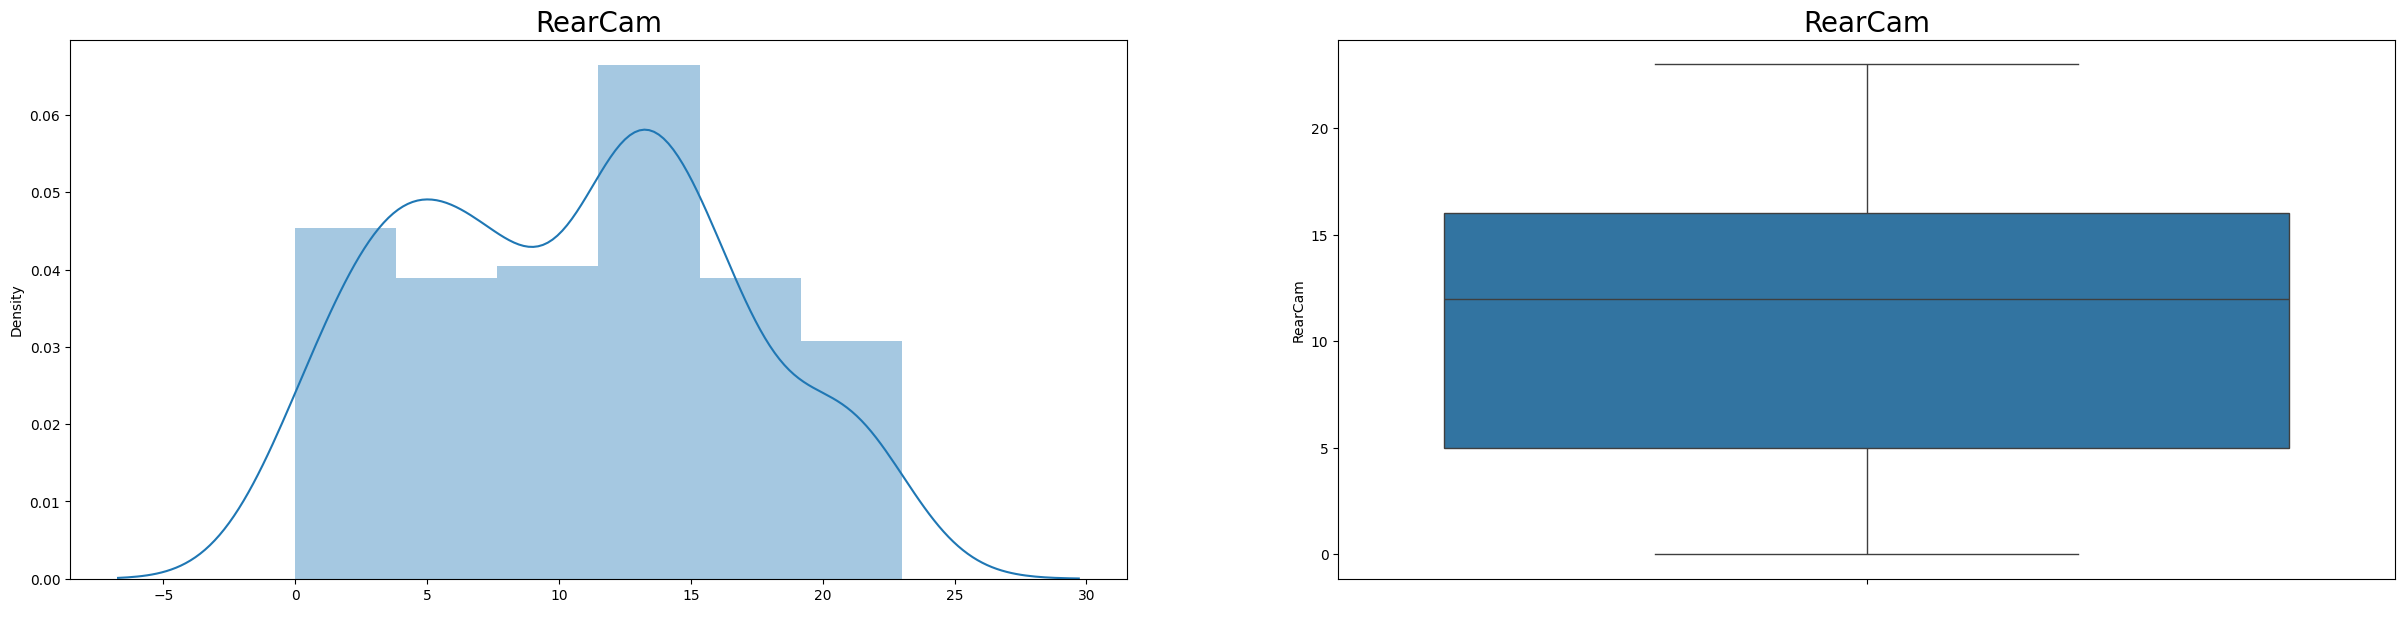

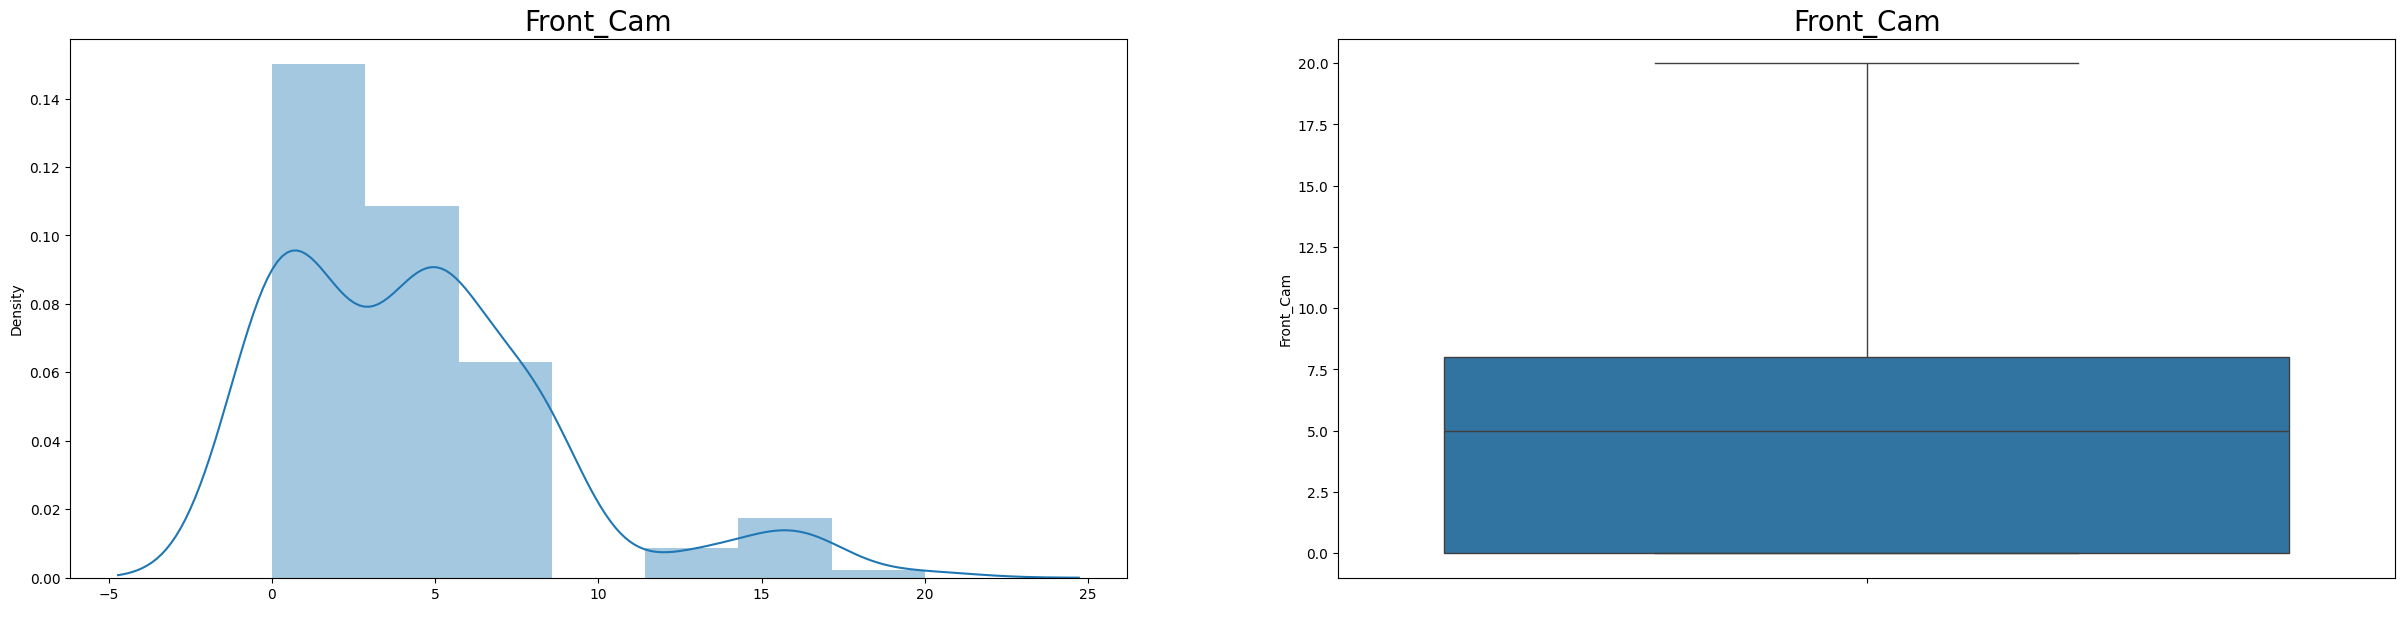

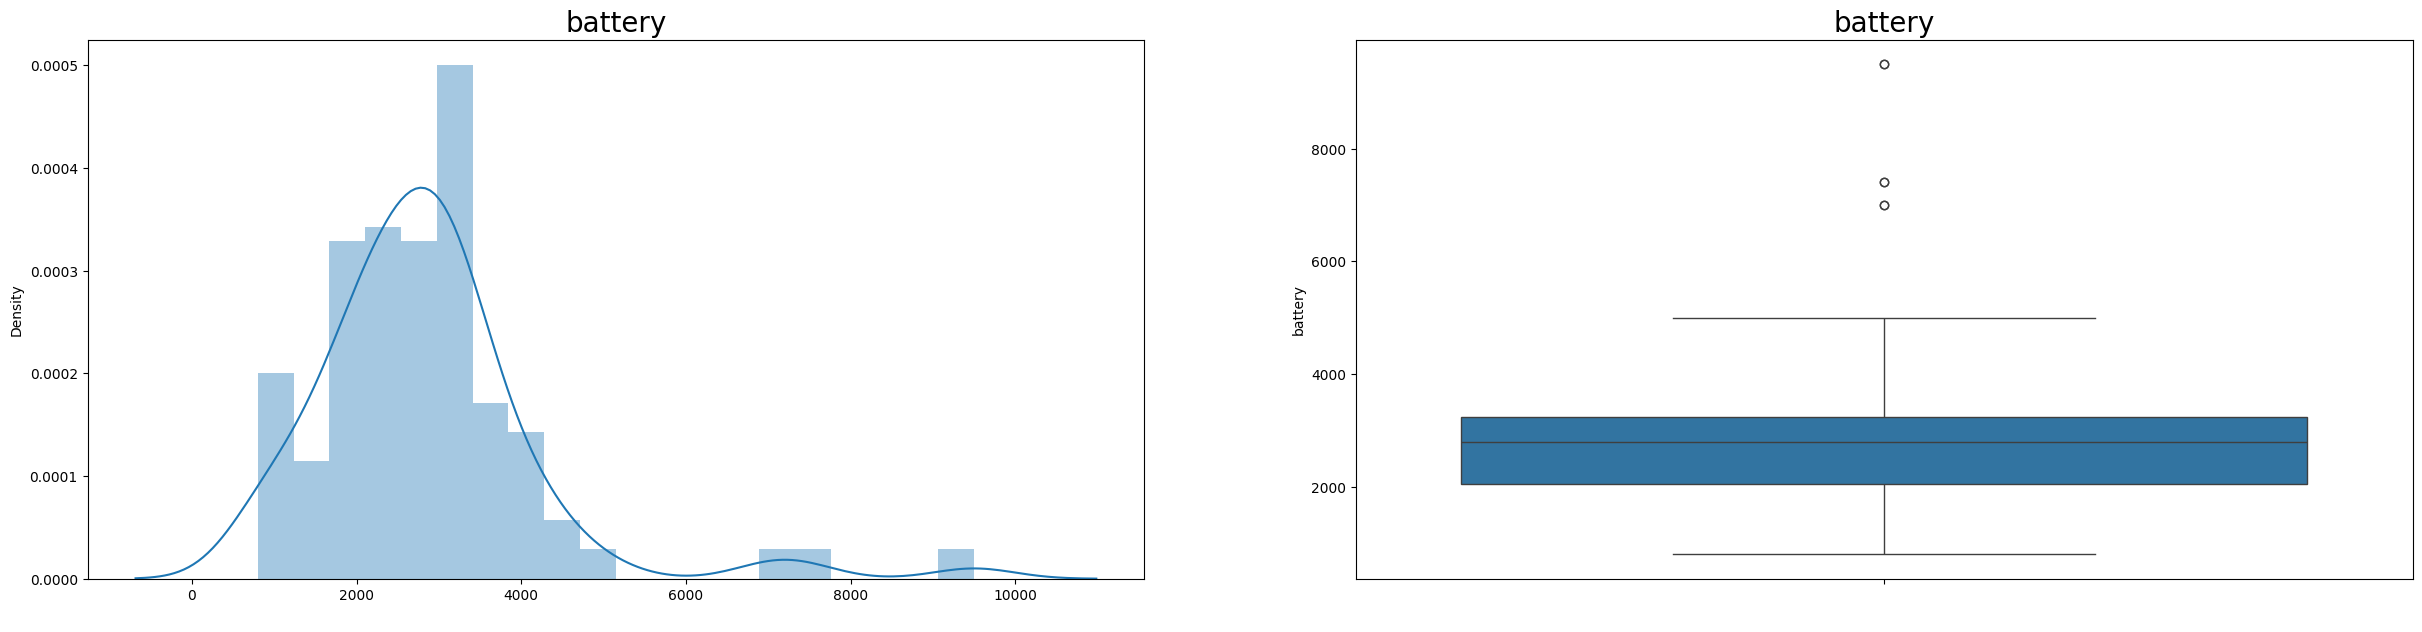

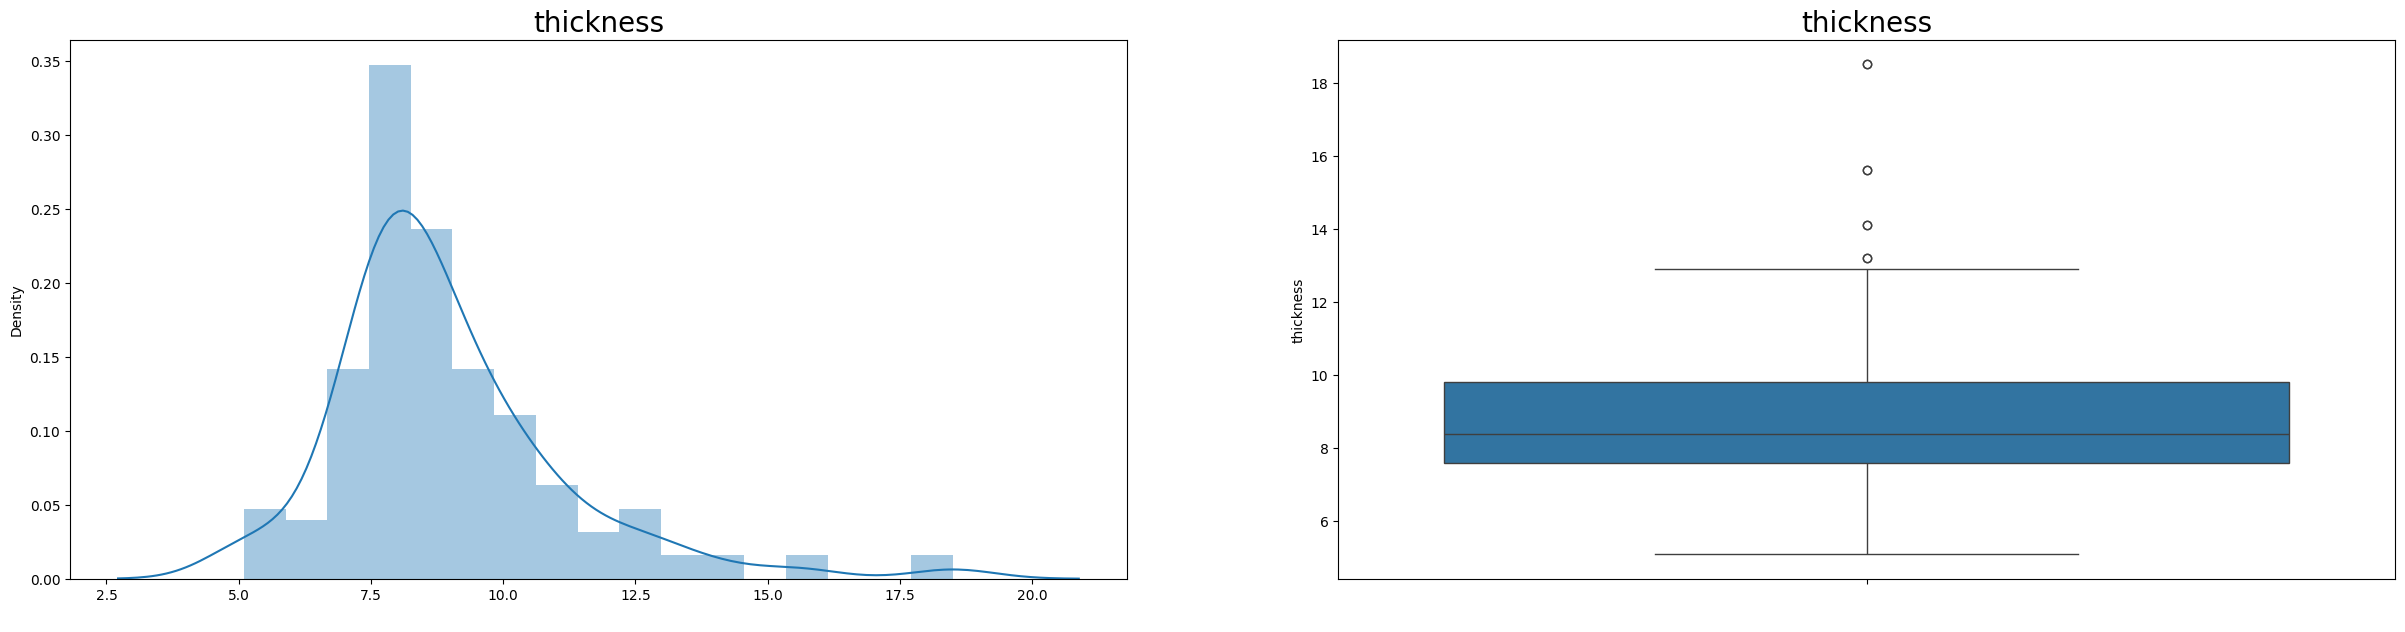

In [8]:
df_columns = df.columns
for index,col in enumerate(df_columns):
    plt.figure(figsize = (30,7))
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    plt.xlabel(" ")
    plt.title(col, size = 20)
    
    plt.subplot(1,2,2)
    sns.boxplot(y = df[col])
    plt.title(col, size = 20)
    plt.show()

In [10]:
df["Price"].min(), df["Price"].max()

(np.int64(614), np.int64(4361))

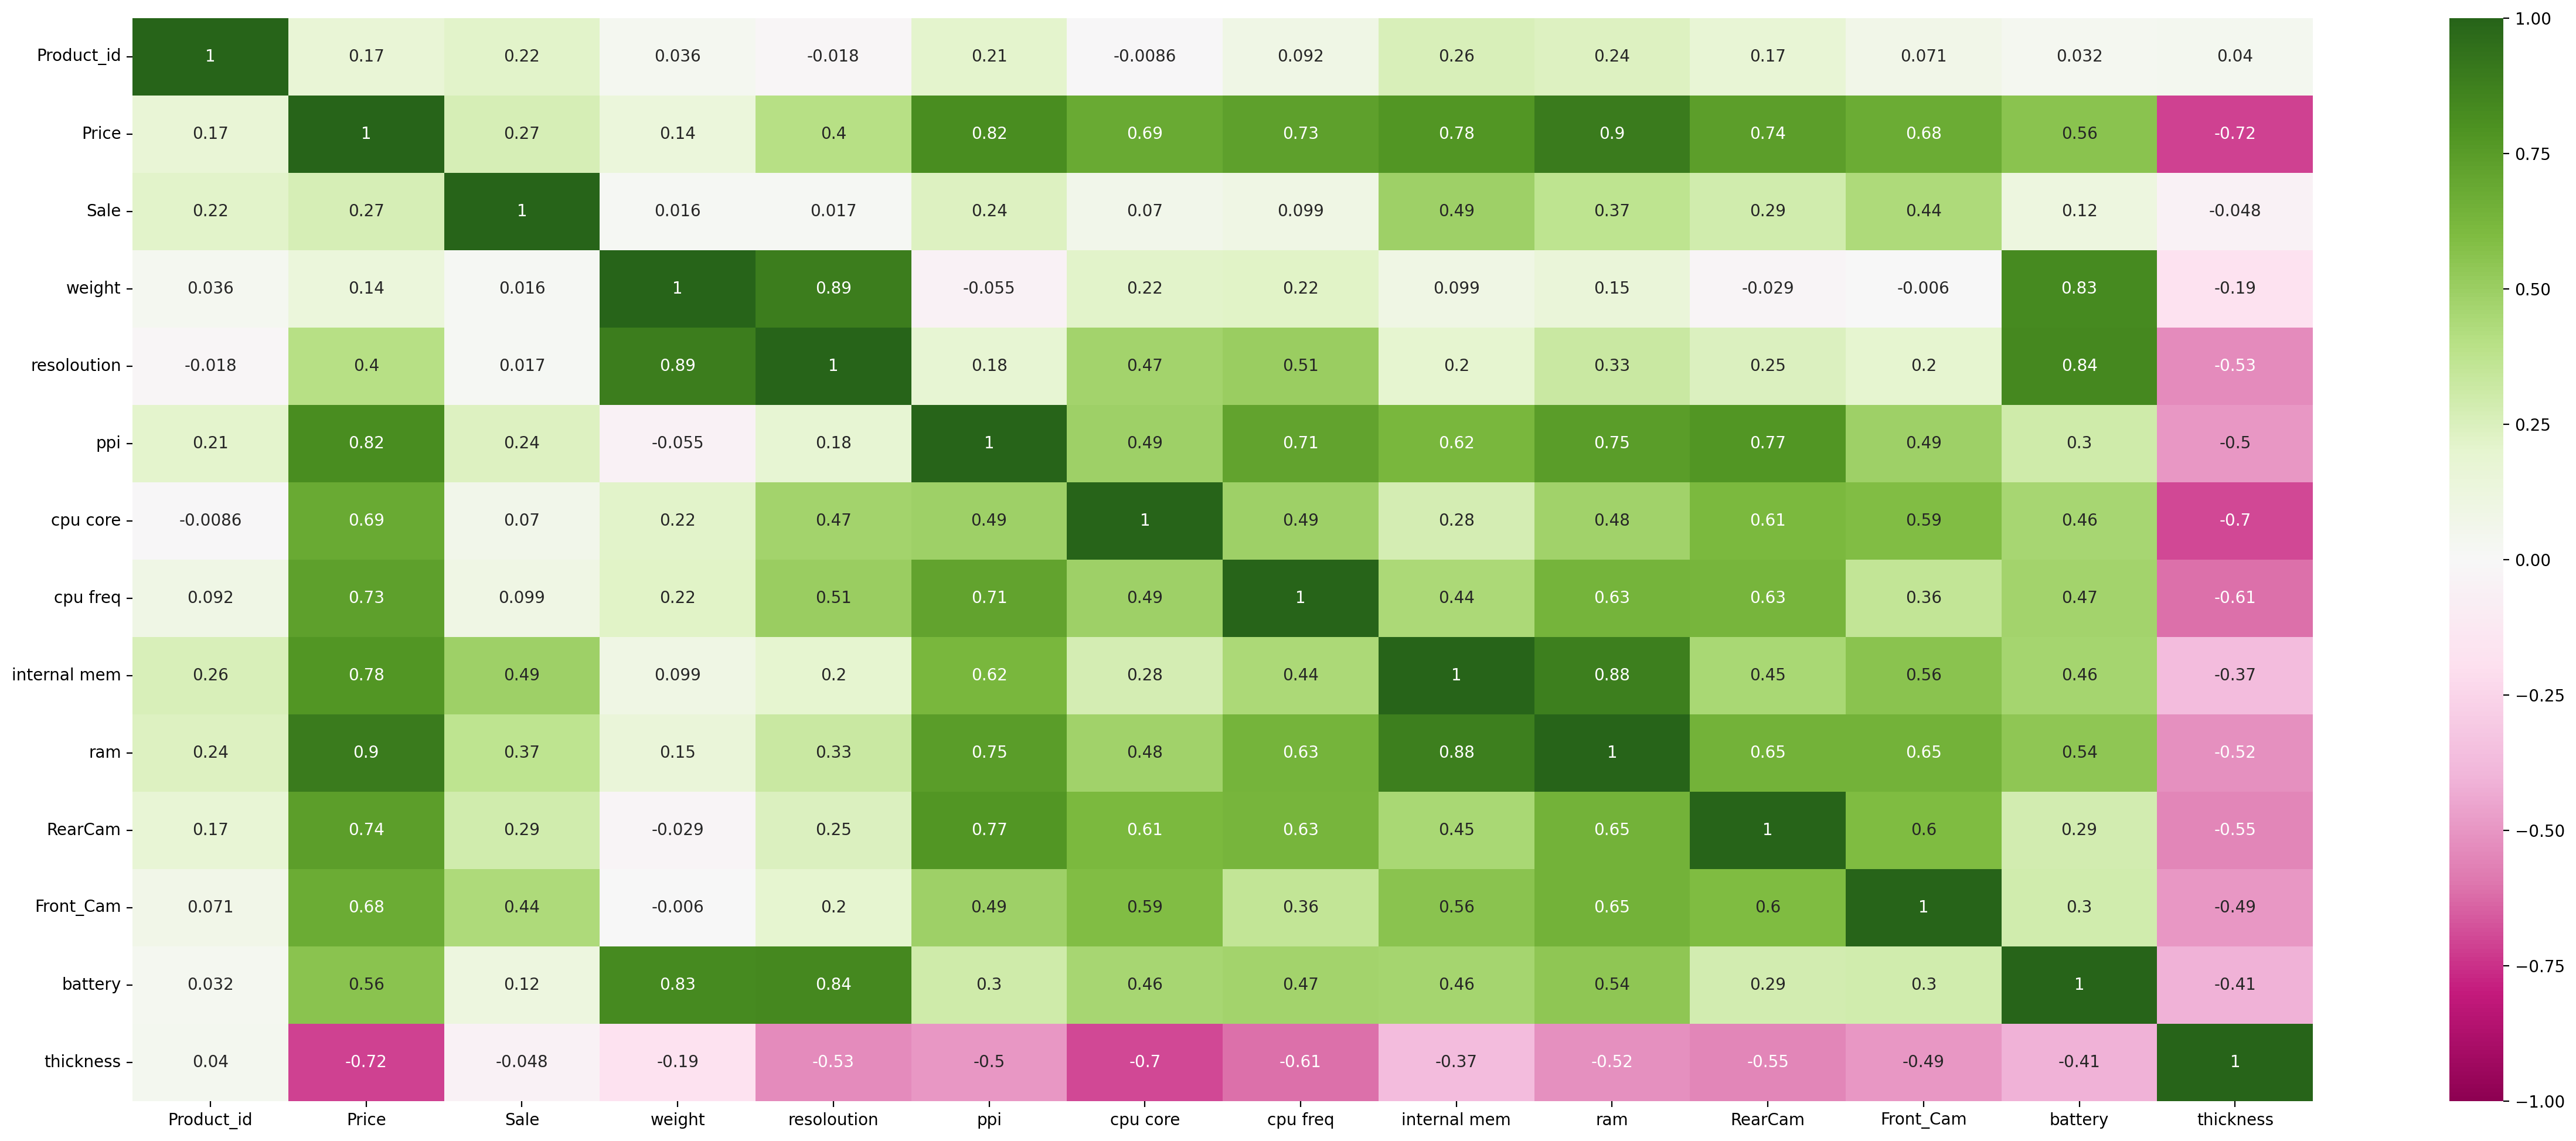

In [11]:
plt.figure(figsize = (30,12), dpi = 200)
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = +1, cmap = "PiYG")
plt.show()

In [12]:
df["Product_id"].nunique()

83

In [13]:
df["Product_id"].value_counts()

Product_id
66      2
1062    2
832     2
133     2
827     2
       ..
203     1
10      1
622     1
40      1
856     1
Name: count, Length: 83, dtype: int64

In [14]:
df[df["Product_id"] == 66]

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
77,66,1396,101,279.0,7.0,170,4,1.2,4.0,1.0,3.0,0.0,3240,9.0
85,66,1396,114,279.0,7.0,170,4,1.2,4.0,1.0,3.0,0.0,3240,9.0


In [15]:
df[df["Product_id"] == 1062]

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
93,1062,1810,164,393.0,8.0,189,4,1.2,16.0,1.5,3.15,1.2,4450,9.7
95,1062,1810,166,393.0,8.0,189,4,1.2,16.0,1.5,3.15,1.2,4450,9.7


In [16]:
X = df.drop(["Price", "Product_id"], axis = 1)
y = df["Price"]

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.1, random_state = 53)

SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

lr = LinearRegression(positive=False)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

# EVALUATION METRICS
print(f"r2_score is: {r2_score(y_test,y_pred)}")
print(f"RMSE is: {np.sqrt(mean_squared_error(y_test,y_pred))}")

r2_score is: 0.9210415573317169
RMSE is: 178.6300219959012


In [18]:
print("r2_score_cross_val:",np.mean(cross_val_score(lr,X_train,y_train, scoring = "r2", cv = 5)))

r2_score_cross_val: 0.9420515016002113


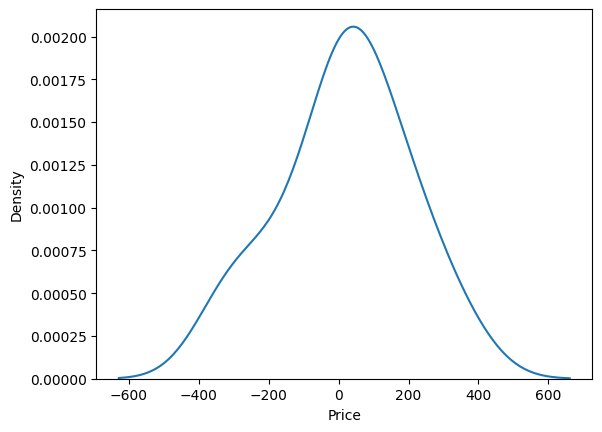

In [19]:
residuals = y_test - y_pred

sns.kdeplot(residuals)
plt.show()

In [20]:
X = df.drop(["Price", "Product_id"], axis = 1)
y = df["Price"]

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.1, random_state = 53)

# STANDARD SCALER
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

In [24]:
backward_feature_selector = SequentialFeatureSelector(LinearRegression(positive=False,n_jobs = -1),
                                                      k_features = (1,12),
                                                      forward = False,floating=False,
                                                      scoring = "r2",
                                                      cv = 5,
                                                      verbose = 0).fit(X_train, y_train)

In [25]:
backward_feature_selector.k_feature_idx_


(0, 2, 3, 4, 5, 6, 7, 9, 10, 11)

In [26]:
backward_feature_selector.k_score_


np.float64(0.9427880298045567)

In [27]:
columnNames_after_FS = X.iloc[:,[0, 2, 3, 4, 5, 6, 7, 9, 10, 11]].columns
columnNames_after_FS

Index(['Sale', 'resoloution', 'ppi', 'cpu core', 'cpu freq', 'internal mem',
       'ram', 'Front_Cam', 'battery', 'thickness'],
      dtype='object')

In [28]:
X = df.loc[:,columnNames_after_FS]
y = df["Price"]

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.1, random_state = 53)

# STANDARD SCALER
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

# LINEAR MODEL FIT AND PREDICT
lr = LinearRegression(positive=False)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

# EVALUATION METRICS
print(f"r2_score is: {r2_score(y_test,y_pred)}")
print(f"RMSE is: {np.sqrt(mean_squared_error(y_test,y_pred))}")

r2_score is: 0.9224537827980924
RMSE is: 177.0253547442593


In [30]:
print("r2_score_cross_val:",np.mean(cross_val_score(lr,X_train,y_train, scoring = "r2", cv = 5)))

r2_score_cross_val: 0.9427880298045567


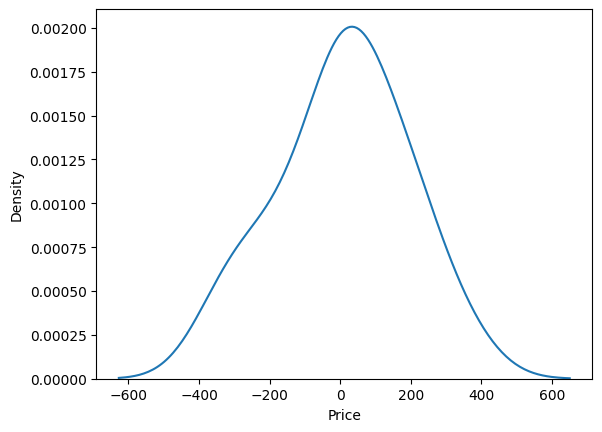

In [31]:
residuals = y_test - y_pred


sns.kdeplot(residuals)
plt.show()

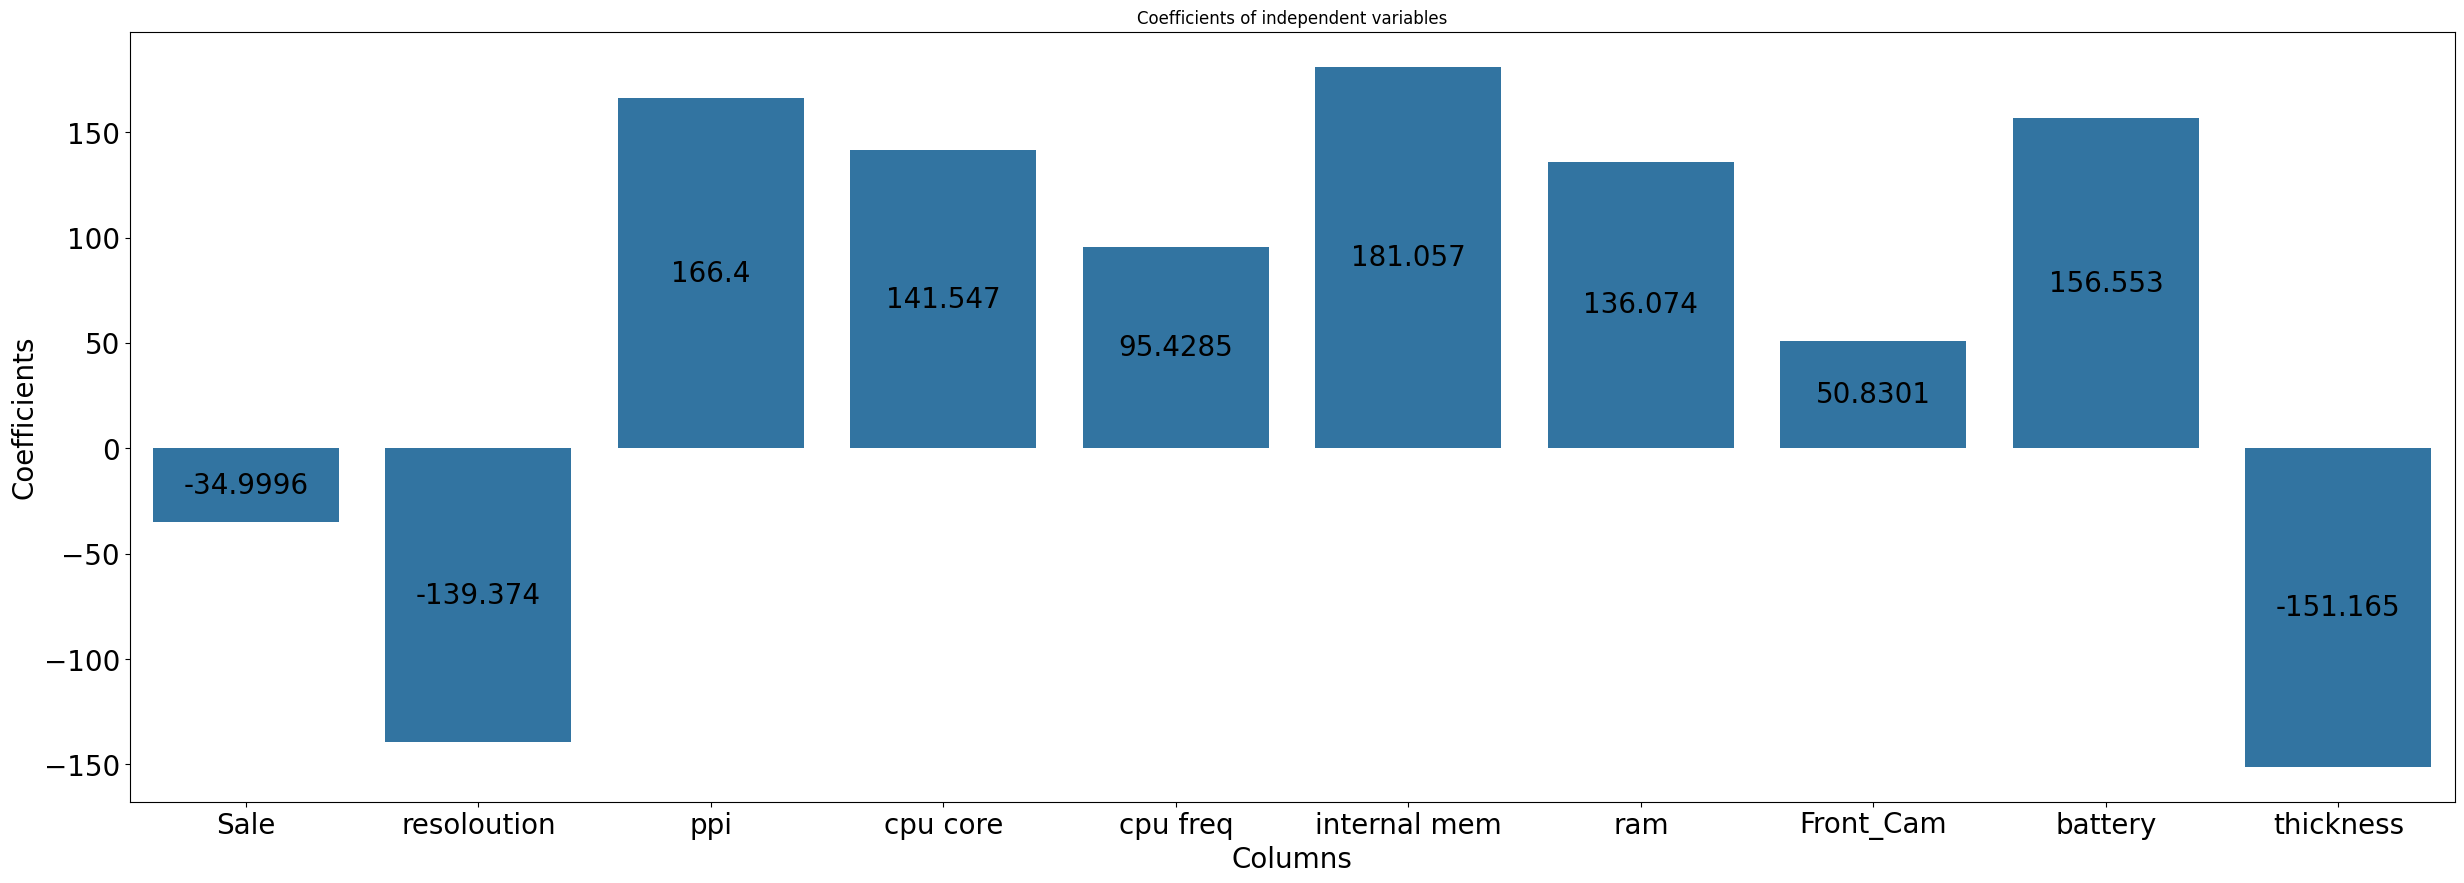

In [32]:
column_names = X.columns
column_coef = pd.DataFrame({"columns" : column_names,
             "coef_": lr.coef_})

plt.figure(figsize = (30,10))
ax = sns.barplot(data = column_coef, x = "columns", y = "coef_")

plt.bar_label(ax.containers[0],size=20,label_type="center")

plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlabel("Columns",size = 20)
plt.ylabel("Coefficients",size = 20)
plt.title("Coefficients of independent variables")
plt.show()